In [118]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv("../given/practical6/METABRIC_RNA_Mutation.csv")
data.head()

/tmp/ipykernel_12036/3798815053.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../given/practical6/METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [120]:
data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [121]:
dataMG = data.loc[:, ["death_from_cancer", 'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut']]
dataMG.head()

,death_from_cancer,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,Living,0,0,0,0,0,0,0,0,0,0
1,Living,0,0,0,0,0,0,0,0,0,0
2,Died of Disease,0,0,0,0,0,0,0,0,0,0
3,Living,0,0,0,0,0,0,0,0,0,0
4,Died of Disease,0,0,0,0,0,0,0,0,0,0


In [122]:
dataMG.isna().sum()

death_from_cancer    1
mtap_mut             0
ppp2cb_mut           0
smarcd1_mut          0
nras_mut             0
ndfip1_mut           0
hras_mut             0
prps2_mut            0
smarcb1_mut          0
stmn2_mut            0
siah1_mut            0
dtype: int64

In [123]:
dataMG["death_from_cancer"]=dataMG["death_from_cancer"].fillna(value="Living")
dataMG.isna().sum()

death_from_cancer    0
mtap_mut             0
ppp2cb_mut           0
smarcd1_mut          0
nras_mut             0
ndfip1_mut           0
hras_mut             0
prps2_mut            0
smarcb1_mut          0
stmn2_mut            0
siah1_mut            0
dtype: int64

# select K- best features

In [125]:
x = dataMG.drop(["death_from_cancer"],axis=1)
x

,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1899,0,0,0,0,0,0,0,0,0,0
1900,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,0,0,0,0,0,0,0


In [126]:
x.dtypes

mtap_mut       object
ppp2cb_mut     object
smarcd1_mut    object
nras_mut       object
ndfip1_mut     object
hras_mut       object
prps2_mut      object
smarcb1_mut    object
stmn2_mut      object
siah1_mut      object
dtype: object

In [127]:
x = pd.get_dummies(data=x, dtype=int, drop_first=True)
x

,mtap_mut_A213S,mtap_mut_A247S,mtap_mut_I138M,mtap_mut_I255L,ppp2cb_mut_G128V,ppp2cb_mut_I224S,ppp2cb_mut_R110C,ppp2cb_mut_R254Q,smarcd1_mut_L434M,smarcd1_mut_M366T,...,hras_mut_Q61R,prps2_mut_G255R,prps2_mut_I159F,smarcb1_mut_0,smarcb1_mut_D159N,smarcb1_mut_I28L,stmn2_mut_N145K,stmn2_mut_R156H,siah1_mut_0,siah1_mut_T249A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [128]:
x.dtypes

mtap_mut_A213S           int64
mtap_mut_A247S           int64
mtap_mut_I138M           int64
mtap_mut_I255L           int64
ppp2cb_mut_G128V         int64
ppp2cb_mut_I224S         int64
ppp2cb_mut_R110C         int64
ppp2cb_mut_R254Q         int64
smarcd1_mut_L434M        int64
smarcd1_mut_M366T        int64
smarcd1_mut_N84S         int64
smarcd1_mut_P78R         int64
nras_mut_D108N           int64
nras_mut_G12S            int64
nras_mut_T124A           int64
ndfip1_mut_A50T          int64
ndfip1_mut_N68S          int64
ndfip1_mut_X51_splice    int64
hras_mut_0               int64
hras_mut_N86T            int64
hras_mut_Q61R            int64
prps2_mut_G255R          int64
prps2_mut_I159F          int64
smarcb1_mut_0            int64
smarcb1_mut_D159N        int64
smarcb1_mut_I28L         int64
stmn2_mut_N145K          int64
stmn2_mut_R156H          int64
siah1_mut_0              int64
siah1_mut_T249A          int64
dtype: object

In [129]:
# remove duplicatie colums
x = x.loc[:, ~x.columns.duplicated()]
x.columns

Index(['mtap_mut_A213S', 'mtap_mut_A247S', 'mtap_mut_I138M', 'mtap_mut_I255L',
       'ppp2cb_mut_G128V', 'ppp2cb_mut_I224S', 'ppp2cb_mut_R110C',
       'ppp2cb_mut_R254Q', 'smarcd1_mut_L434M', 'smarcd1_mut_M366T',
       'smarcd1_mut_N84S', 'smarcd1_mut_P78R', 'nras_mut_D108N',
       'nras_mut_G12S', 'nras_mut_T124A', 'ndfip1_mut_A50T', 'ndfip1_mut_N68S',
       'ndfip1_mut_X51_splice', 'hras_mut_0', 'hras_mut_N86T', 'hras_mut_Q61R',
       'prps2_mut_G255R', 'prps2_mut_I159F', 'smarcb1_mut_0',
       'smarcb1_mut_D159N', 'smarcb1_mut_I28L', 'stmn2_mut_N145K',
       'stmn2_mut_R156H', 'siah1_mut_0', 'siah1_mut_T249A'],
      dtype='object')

In [130]:
y =dataMG["death_from_cancer"]

In [131]:
xSuggestion = SelectKBest(f_classif, k=4).fit(x,y)
suggestCol = xSuggestion.get_support(indices=True)

In [132]:
x.iloc[:5, suggestCol]

,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [133]:
xBest = SelectKBest(f_classif, k=4).fit_transform(x,y)
xBest

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [1, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 0, 1]])

In [134]:
xScaled = StandardScaler().fit_transform(xBest)
xScaled

array([[-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       [-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       [-0.92506783, -0.92506783, -0.02292348, -0.92604588],
       ...,
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ],
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ],
       [ 1.08100181,  1.08100181, -0.02292348,  1.0798601 ]])

In [82]:
# try to find optimal number of cluster using elbow plot
wcss =[]
for i in range(2,6):
    wcss.append(KMeans(init="random", n_clusters=i, random_state=200).fit(xScaled).inertia_)
wcss

[1923.2199368297936, 20.0797634193886, 12.049372863386075, 8.030275898865291]

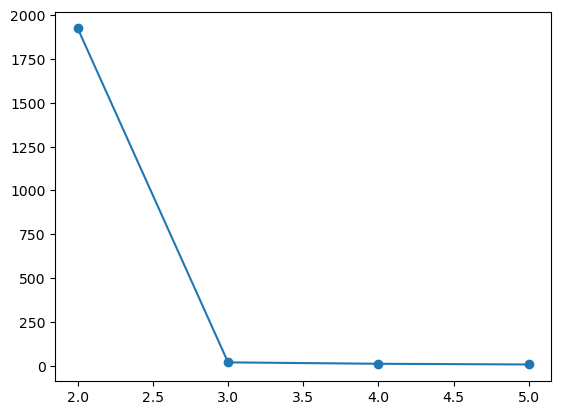

In [85]:
plt.plot([i for i in range(2,6)],wcss, marker="o")

In [89]:
#hence choose 2

model = KMeans(init="random", n_clusters=2, random_state=200)
fit = model.fit(xScaled)
clusters = fit.predict(xScaled)
clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [90]:
x["cluster"] =clusters
x["cluster"].value_counts()

cluster
1    1024
0     880
Name: count, dtype: int64

In [91]:
silhouette_score(xBest, clusters)

0.996067024279685

In [95]:

toPlot = x.iloc[:, suggestCol]
toPlot["cluster"] = x["cluster"]
toPlot["death_from_cancer"] = y
toPlot.head()

/tmp/ipykernel_12036/351333394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toPlot["cluster"] = x["cluster"]
/tmp/ipykernel_12036/351333394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toPlot["death_from_cancer"] = y


,hras_mut_0,smarcb1_mut_0,stmn2_mut_N145K,siah1_mut_0,cluster,death_from_cancer
0,0,0,0,0,1,Living
1,0,0,0,0,1,Living
2,0,0,0,0,1,Died of Disease
3,0,0,0,0,1,Living
4,0,0,0,0,1,Died of Disease


In [96]:
toPlot["death_from_cancer"].unique()

array(['Living', 'Died of Disease', 'Died of Other Causes'], dtype=object)

([<matplotlib.axis.XTick at 0x7fd918d03320>,
 [Text(0, 0, '0'), Text(2, 0, '1')])

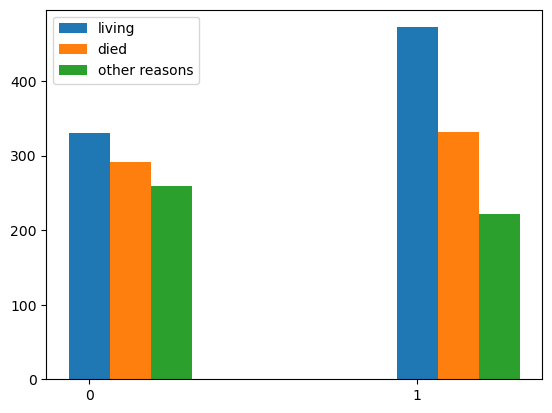

In [117]:
x = np.array([0,2])
plt.bar(x,(toPlot[toPlot["death_from_cancer"] == "Living"]).groupby("cluster")["death_from_cancer"].count(), width=0.25, label="living")
plt.bar(x+0.25,(toPlot[toPlot["death_from_cancer"] == "Died of Disease"]).groupby("cluster")["death_from_cancer"].count(), width=0.25, label="died")
plt.bar(x+0.5,(toPlot[toPlot["death_from_cancer"] == "Died of Other Causes"]).groupby("cluster")["death_from_cancer"].count(), width=0.25, label="other reasons")
plt.legend()

plt.xticks([0,2], [0,1])